In [ ]:
!unzip -n hi_hdtb_models.zip
!cp -r hi_hdtb_models ~/stanfordnlp_resources/hi_hdtb_models

In [3]:
!git clone https://github.com/s-ankur/errant
%cd errant
!git clone https://github.com/nusnlp/m2scorer
!pip install -e .
!curl --user-agent 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:80.0) Gecko/20100101 Firefox/80.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --header 'DNT: 1' --header 'Upgrade-Insecure-Requests: 1' 'https://nlp.stanford.edu/software/stanfordnlp_models/0.2.0/hi_hdtb_models.zip/' -o hi_hdtb_models.zip
!unzip -n hi_hdtb_models.zip
!mkdir -p ~/stanfordnlp_resources
!cp -r hi_hdtb_models ~/stanfordnlp_resources/hi_hdtb_models
!mkdir -p ../data/out

fatal: destination path 'errant' already exists and is not an empty directory.
/home/mh07607/Documents/hindi_grammar_correction/Colab Notebooks/errant/errant
Cloning into 'm2scorer'...
remote: Enumerating objects: 57, done.
remote: Total 57 (delta 0), reused 0 (delta 0), pack-reused 57
Receiving objects: 100% (57/57), 34.86 KiB | 379.00 KiB/s, done.
Resolving deltas: 100% (25/25), done.
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///home/mh07607/Documents/hindi_grammar_correction/Colab%20Notebooks/errant/errant
ERROR: file:///home/mh07607/Documents/hindi_grammar_correction/Colab%20Notebooks/errant/errant does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   389  100   389    0     0    276      0  0:00:01  0:00:01 --:--:--   276
Archive:  hi_hd

In [7]:
WIKI_EXTRACTED_DIR="./data"
%cd '/home/mh07607/Documents/hindi_grammar_correction/Colab Notebooks'
#!python3  errant/commands/parallel_to_m2.py  -orig $WIKI_EXTRACTED_DIR/hiwiki.extracted.clean.src -cor $WIKI_EXTRACTED_DIR/hiwiki.extracted.clean.trg>tmp.log
#!python3 -m errant.errant.commands.parallel_to_m2 -orig $WIKI_EXTRACTED_DIR/urwiki.extracted.clean.src -cor $WIKI_EXTRACTED_DIR/urwiki.extracted.clean.trg > tmp.log
!python3 -m errant.errant.commands.parallel_to_m2 -orig gold/test_src.txt -cor gold/test_trg.txt > tmp.log


/home/mh07607/Documents/hindi_grammar_correction/Colab Notebooks
2024-01-05 12:39:21 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2024-01-05 12:39:22 INFO: Loading these models for language: ur (Urdu):
| Processor | Package       |
-----------------------------
| tokenize  | udtb          |
| pos       | udtb_nocharlm |
| lemma     | udtb_nocharlm |
| depparse  | udtb_nocharlm |

2024-01-05 12:39:22 INFO: Using device: cuda
2024-01-05 12:39:22 INFO: Loading: tokenize
2024-01-05 12:39:23 INFO: Loading: pos
2024-01-05 12:39:23 INFO: Loading: lemma
2024-01-05 12:39:23 INFO: Loading: depparse
2024-01-05 12:39:23 INFO: Done loading processors!


In [28]:
tmp=!cat error_file
c={a:int(b) for a,b in map(str.split,tmp[0].split("R:")[1:])}
from collections import Counter
c=Counter(c)
print(sum(c.values()))
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.4)
sns.set_style('whitegrid')
sns.set_palette('inferno_r')
c['OTHER']+=c["NUM"]
del c['NUM']
c=dict(c.most_common())

175197


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/tmp/ipykernel_683674/2287760376.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=x_values, y=y_values, palette=("viridis"))


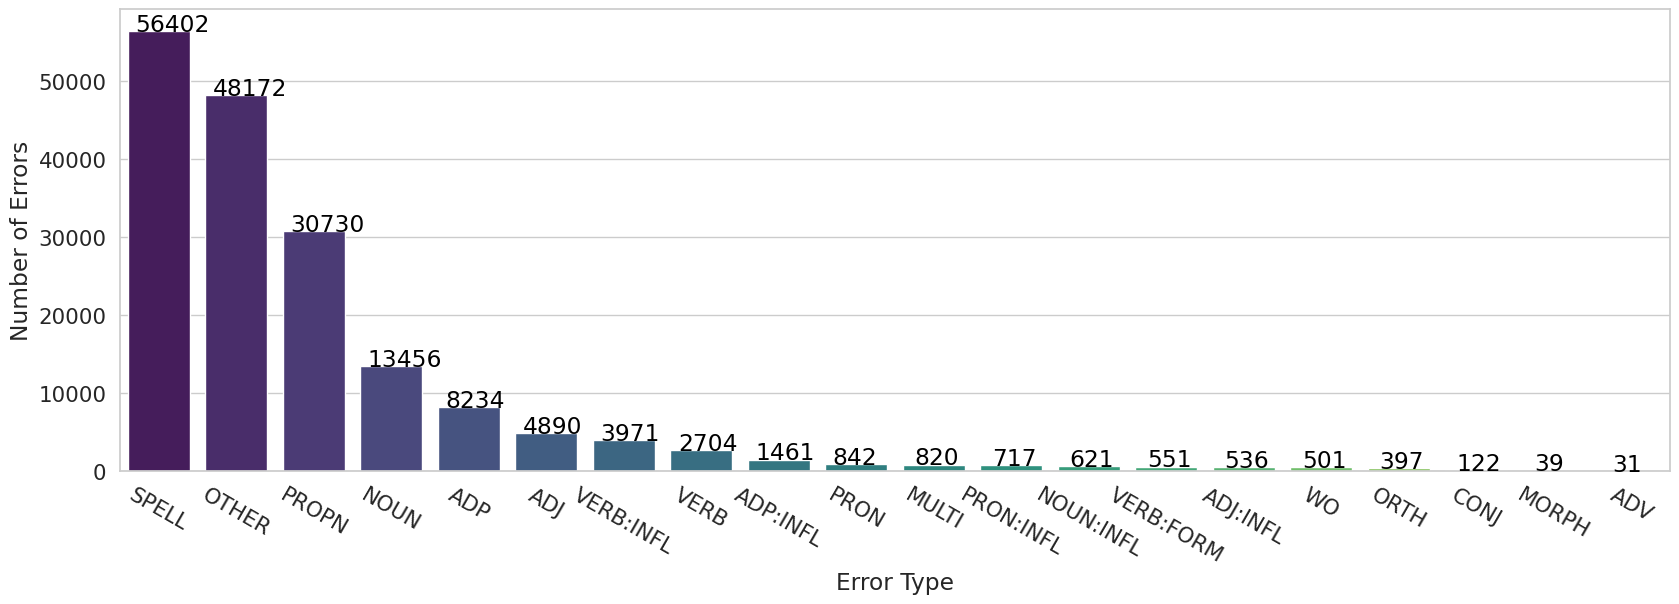

In [40]:
fig = plt.figure(figsize=(20, 6))

# Skip the first 6 elements
x_values = list(c.keys())
y_values = list(c.values())

ax = sns.barplot(x=x_values, y=y_values, palette=("viridis"))

y_pos = range(len(x_values))
plt.xticks(y_pos, x_values, rotation=-30)

fig.axes[0].set_ylabel('Number of Errors')
fig.axes[0].set_xlabel('Error Type')

for i, v in enumerate(y_values):
    ax.text(1.00 * (i - (4.0 - len(str(i))) * 0.05) - 0.15, v + 30, str(v), color='black')

plt.show()


In [ ]:
import os


for model in ('fairseq','mlconvgec','basetransformer'):
  out_files=[]
  trg_files=[]
  src_files=[]
  m2_files=[]

  err_types =  os.listdir("../data/out")  

  for err_type in err_types :
      err_fold=os.path.join("../data/out",err_type)
      out_file=os.path.join(err_fold, model+".out")
      m2_file =os.path.join(err_fold,err_type+'.m2')
      src_file =os.path.join(err_fold,err_type+'.src')
      trg_file =os.path.join(err_fold,err_type+'.trg')

      trg_files.append(trg_file)
      src_files.append(src_file)
      out_files.append(out_file)
      m2_files.append(m2_file)
      !python2 m2scorer/scripts/m2scorer.py  $out_file $m2_file >{err_fold}/{model}.m2score
      !python errant/gleu.py -r $trg_file -s $src_file --hyp  $out_file>{err_fold}/{model}.gleu

  out_files=" ".join(out_files)
  trg_files=" ".join(trg_files)
  src_files=" ".join(src_files)
  m2_files=" ".join(m2_files)

  !mkdir -p ../data/{model}
  !cat $out_files> ../data/{model}/{model}.out
  !cat $trg_files> ../data/{model}/{model}.trg
  !cat $src_files> ../data/{model}/{model}.src
  !cat $m2_files> ../data/{model}/{model}.m2
  !python2 m2scorer/scripts/m2scorer.py  ../data/{model}/{model}.out ../data/{model}/{model}.m2 >../data/{model}/{model}.m2score
  !python errant/gleu.py -r data/{model}/{model}.trg -s data/{model}/{model}.src --hyp  data/{model}/{model}.out>data/{model}/{model}.gleu

In [ ]:
import os
model='fairseq'
err_types =  os.listdir("out")
for err_type in err_types :
  print(err_type)
  !head out/{err_type}/{model}.gleu out/{err_type}/{model}.m2score
!head data/{model}/{model}.gleu data/{model}/{model}.m2score

In [ ]:
!head -40 out/R_VERB_INFL/*

==> out/R_VERB_INFL/basetransformer.gleu <==
out/R_VERB_INFL/R_VERB_INFL_basetransformer.out
There is one reference. NOTE: GLEU is not computing the confidence interval.
0.794382

==> out/R_VERB_INFL/basetransformer.m2score <==
Precision   : 0.5720
Recall      : 0.4690
F_0.5       : 0.5480

==> out/R_VERB_INFL/basetransformer.out <==
चाय के दुकान से लेकर वाहनों और दिवारों तक हर जगह विज्ञापन ही विज्ञापन दिखाई देते हैं .
आज हम विज्ञापन युग के सीमान्त पर आ खड़े हुए हैं .
वो धूम 3 में दिखीं जिसने भारतीय फ़िल्मों में सबसे ज़्यादा कमाई के हैं .
कुछ लोग इस ह्रास को विकासशील राष्ट्रों में सामाजिक अशांति एवं संघर्ष के प्रमुख कारण के रूप में देखते हैं .
2 व्यापक रूप मे काबीनेक संश्लेषण मे नियोजित किया गया है .
मुख्य रूप से सोडियम एमाइड एक मजबूत बेस मे कार्बनिक रसायन , तरल अमोनिया समाधान मे अक्सर के रूप मे प्रयोग किया जाता है .
इंडिगो , सोडियम के औद्योगिक उत्तपादन मे एमाइड लाते हैं के अत्यधिक मूल मिश्रण का एक घटक है .
इसके अतिरिक्त यहाँ हाल ही में बने मॉल जैसे सिटीवाक और एम जी एफ मेट्रोपोलिटन भी 